In [2]:
### 시작 및 본인정보 반영
# 반드시 이 cell을 실행하시오
# 실행하지 않을 시 직접 하지 않은 것으로 간주
# 마지막 줄 출력으로 파일명을 설정하고 제출 필수
import platform, psutil, os, datetime
print(platform.processor())
print(str(round(psutil.virtual_memory().total / (1024.0 **3)))+"(GB)")
print(platform.system())
print(platform.version())
print(os.getcwd())
print(datetime.datetime.fromtimestamp(os.path.getctime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getmtime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getatime(os.getcwd())))
print(datetime.datetime.now())
title = 'DA_SupervisedClassification'    # 고정값
name = '허유빈'    # 본인 이름을 작성
studentid = '202000251'    # 본인 학번을 작성
# 아래 강좌 명 중 본인이 수강하는 강과명 작성
# 비즈니스데이터사이언스이해, E정보시스템, 디지털비즈니스애널리틱스, E데이터베이스, 인공지능기반의사결정, 빅데이터 등
# 비즈니스혁신을위한데이터사이언스응용, 인공지능활용디지털경제플랫폼연구 등
course = 'E데이터베이스'    
print('다음 출력을 파일명으로 설정하고 제출하시오:', name + '_' + studentid + '_' + course + '_' + title)

Intel64 Family 6 Model 142 Stepping 11, GenuineIntel
8(GB)
Windows
10.0.22621
C:\Users\허\수업
2023-03-07 21:22:07.776971
2023-05-12 02:13:14.805387
2023-05-12 02:13:14.805387
2023-05-12 02:13:28.916905
다음 출력을 파일명으로 설정하고 제출하시오: 허유빈_202000251_E데이터베이스_DA_SupervisedClassification


# **Data Loading:** 분석에 사용할 데이터 불러오기

- 아래 `비즈니스 문제 대상 데이터`의 비즈니스 목적을 보고 `관심있는 데이터`를 선택하여 불러오기
- 모든 데이터는 [Kaggle Competition](https://www.kaggle.com/)에서 추출되었으며, `현 Jupyter Notebook`과 동일폴더에 있음
- 저장된 데이터는 아래 설명 참고링크에서 다움받은 후 `일부 전처리 후 저장`되어 있기 떄문에 다를 수 있고 `저장된 데이터만 사용`
- 개인PC에서 `pandas -> read_csv()`로 불러오기 가능하고 `Google Colab으로 로딩`도 불러와도 됨
- 모든 데이터 분석 결과들은 향후 `경진대회나 공모전 및 데이터사이언스 분야 면접이나 시험`에 대비 가능

| **분야** | **비즈니스 목적** | **파일명** | **종속변수 Y** | **설명 참고링크** |
|:---:|:---|:---|:---|:---|
| **Tour** | 고객들의 여행취소를 정확하게 예측하여   취소가 예상되는 고객을 찾고 기업의 매출손실 대비 | `Classification_TravelCustomerChurn.csv` | `Target` | https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction |
| **Marketing** | 마케팅이 구매로 이어지는 관계를   정확하게 예측 및 특성을 확인하여 마케팅 효과를 높이고 매출 향상 지원 | `Classification_MarketingEfficiency.csv` | `Response` | https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign |
| **Human** | 기업 임직원들의 불만족을 정확하게   예측하여 퇴사 확률을 낮출 수 있는 인사전략 지원 | `Classification_JobSatisfaction.csv` | `satisfaction_level` | https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction |
| **Medicine** | 심장질환 여부를 정확하게 예측하여   심장질환에 걸릴 가능성이 높은 고객의 특징을 예측 | `Classification_HeartDisease.csv` | `TenYearCHD` | https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression |
| **Ecommerce** | 이커머스 만족도를 정확하게 예측하여   만족도 향상을 위한 특성을 확인하고 고객 유입 전략 지원 | `Classification_EcommerceSatisfaction.csv` | `Customer_rating` | https://www.kaggle.com/datasets/prachi13/customer-analytics |
| **Service** | 항공기를 이용하는 고객의 서비스   만족도를 정확하게 예측하여 특성을 확인하고 추가적인 서비스기획 지원 | `Classification_AirlineSatisfaction.csv` | `satisfaction` | https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction |


In [7]:
# 파이썬이 데이터 위치를 확인할 수 있게 코드로 변환
# pandas 사용하여 데이터 불러오기
# 불러온 데이터 이름을 통상 dataframe의 약자인 df로 사용
df = pd.read_csv(r"C:\Users\허\수업\Classification_TravelCustomerChurn.csv")
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


# **Import Library:** 분석에 사용할 모듈 설치

- 강의에서 배운 내용이든 아니든 `자유 설치 및 사용`

In [4]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip

In [5]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics
# for classification
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# **Preprocessing:** 데이터 정리 및 패턴 추출하기

- 선택한 `데이터 및 비즈니스 목적` 달성을 위한 `알고리즘 기반 데이터분석`을 하기 위해 필요한 전처리 작업 `자유 진행`
- `하기 항목의 점검 또는 전처리`는 반드시 반영하며 `설명은 주석 또는 시각화로 작성하고 없으면 안한 것으로 간주`

> (1) `결측값 존재여부 확인 및 전처리`
>
> (2) `이상치 존재여부 확인 및 전처리`
>
> (3) `데이터 값들에 대한 자료형 변환 필요성 및 전처리`
> 
> (4) 데이터 분리는 `Train & Test`로만 분리하며, 각각의 비율은 `80% & 20%`로 실행
>
> (5) 변수들의 `데이터 변환 필요성, 전처리 및 이유`
>
> (6) `데이터 스케일링`도 반드시 실행하되 `종류는 자유 선택 전처리`

In [8]:
df.info() #자료형 변환 필요없다. 데이터 변환이 필요하다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


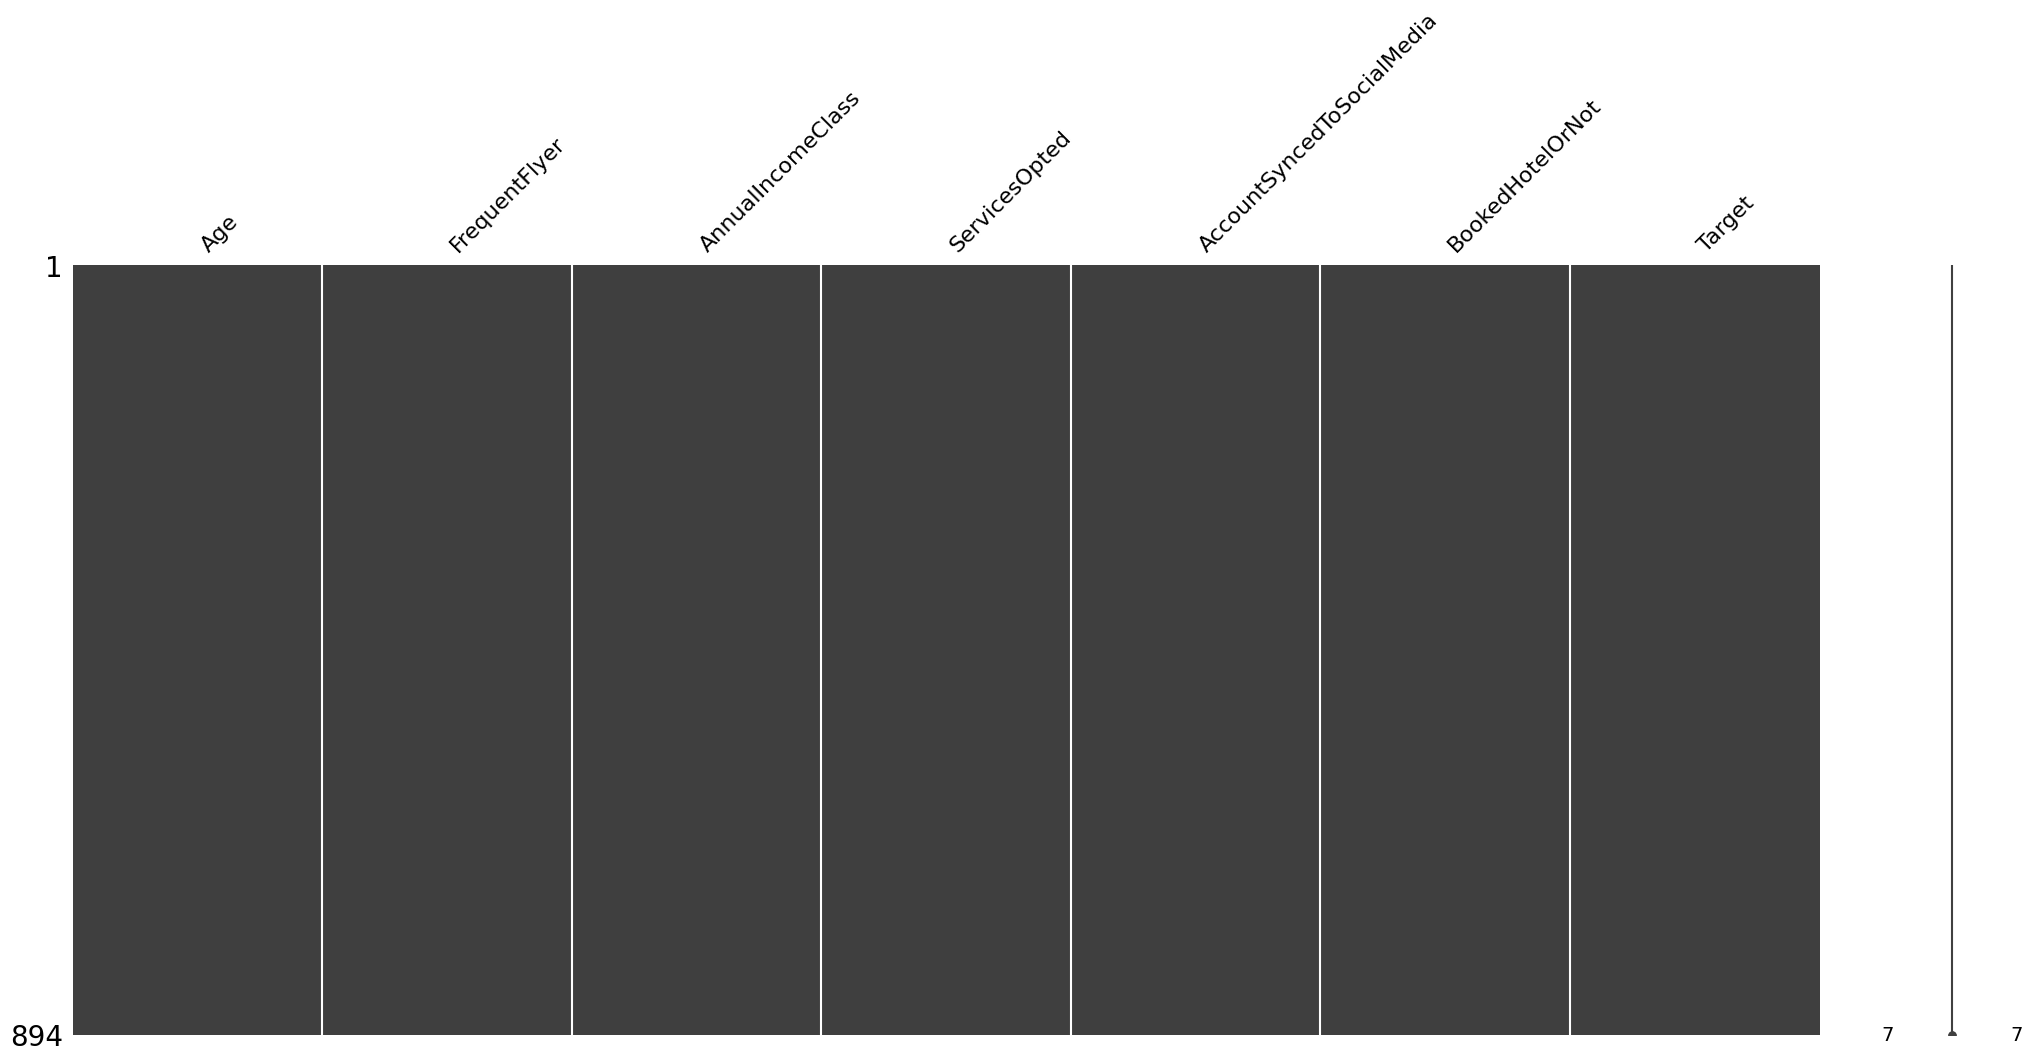

In [9]:
# 결측값 처리
def fillnull(df):
    df['FrequentFlyer'] = df['FrequentFlyer'].replace('No Record', np.nan)
    df = df.dropna(axis=0) # 955개 열중에 60개의 열  6.3%가 결측값이기 때문에, 삭제를 진행해도 여전히 데이터 분석에 적합하다.
    return df

df = fillnull(df)

# 결측치 처리 후 missingno 함수를 사용하여 변화 확인
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

In [10]:
# 데이터 정리
display(df['Age'].describe()) #나이가 2,30대 밖에 없기 때문에 데이터 정리할 필요가 없다.

count   894.00
mean     32.16
std       3.34
min      27.00
25%      30.00
50%      31.00
75%      35.00
max      38.00
Name: Age, dtype: float64

In [11]:
# 데이터 분리

def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test
# 종속변수로 사용할 컬림 이름 Target
# 데이터를 X_train, X_test, Y_train, Y_test로 분리하기
Y_colname = ['Target']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)
display(X_test, Y_test)

(715, 6) (715, 1)
(179, 6) (179, 1)


,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
182,38,No,Middle Income,3,Yes,No
559,31,No,Low Income,4,Yes,No
482,35,No,Middle Income,5,Yes,No
180,30,No,Middle Income,6,No,Yes
637,37,Yes,Low Income,1,Yes,No
...,...,...,...,...,...,...
414,36,Yes,Low Income,1,No,Yes
360,30,No,Middle Income,6,No,Yes
820,27,No,Low Income,5,Yes,Yes
829,28,Yes,Low Income,1,Yes,No


,Target
182,0
559,1
482,1
180,0
637,1
...,...
414,0
360,0
820,0
829,1


In [12]:
# 데이터 변환
def label_encoding(X_train, X_test, colname, encoder):
    X_train_le = X_train.copy()
    X_test_le = X_test.copy()
    
    for i in colname: # 대상 변수들마다
        encoder = encoder.fit(X_train[i])

        for label in X_test[i].unique():
            if label not in encoder.classes_:
                encoder.classes_ = np.append(encoder.classes_, label)

        X_train_le[i] = encoder.transform(X_train[i])
        X_test_le[i] = encoder.transform(X_test[i])
        
    return X_train_le, X_test_le


def onehot_encoding(df, colname):
    df_ohe = df.copy()
    
    for i in colname:
        if i in df.columns:
            df_ohe = pd.get_dummies(df_ohe, columns=[i], drop_first=True)
            
    return df_ohe

# 데이터 변환 후 X_train과 X_test의 변수 갯수 일치
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # Train & Test 변수명 체크
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # 변수 갯수 일치
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


label_colname = ['AnnualIncomeClass'] # 'AnnualIncomeClass' 는 이진법 변수가 아니기때문에 Label encoding으로 진행
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['FrequentFlyer', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot'] # 나머지 3열은 이진법 변수여서 가변수화
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)

display(X_train_fe, X_test_fe) # 'AnnualIncomeClass' LabelEncoding, 'FrequentFlyer', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot' 가변수화

,Age,AnnualIncomeClass,ServicesOpted,FrequentFlyer_Yes,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
351,31,1,2,0,0,0
802,33,1,1,0,1,0
216,37,2,4,0,1,1
449,34,0,1,1,0,0
103,28,1,2,0,0,0
...,...,...,...,...,...,...
104,30,2,4,0,0,1
344,35,1,3,1,0,1
407,27,1,2,0,1,0
390,36,2,6,0,0,1


,Age,AnnualIncomeClass,ServicesOpted,FrequentFlyer_Yes,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
182,38,2,3,0,1,0
559,31,1,4,0,1,0
482,35,2,5,0,1,0
180,30,2,6,0,0,1
637,37,1,1,1,1,0
...,...,...,...,...,...,...
414,36,1,1,1,0,1
360,30,2,6,0,0,1
820,27,1,5,0,1,1
829,28,1,1,1,1,0


In [13]:
# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling
scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)
# 스케일링 후
display(X_train_fes, X_test_fes)

,Age,AnnualIncomeClass,ServicesOpted,FrequentFlyer_Yes,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
351,0.36,0.50,0.20,0.00,0.00,0.00
802,0.55,0.50,0.00,0.00,1.00,0.00
216,0.91,1.00,0.60,0.00,1.00,1.00
449,0.64,0.00,0.00,1.00,0.00,0.00
103,0.09,0.50,0.20,0.00,0.00,0.00
...,...,...,...,...,...,...
104,0.27,1.00,0.60,0.00,0.00,1.00
344,0.73,0.50,0.40,1.00,0.00,1.00
407,0.00,0.50,0.20,0.00,1.00,0.00
390,0.82,1.00,1.00,0.00,0.00,1.00


,Age,AnnualIncomeClass,ServicesOpted,FrequentFlyer_Yes,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
182,1.00,1.00,0.40,0.00,1.00,0.00
559,0.36,0.50,0.60,0.00,1.00,0.00
482,0.73,1.00,0.80,0.00,1.00,0.00
180,0.27,1.00,1.00,0.00,0.00,1.00
637,0.91,0.50,0.00,1.00,1.00,0.00
...,...,...,...,...,...,...
414,0.82,0.50,0.00,1.00,0.00,1.00
360,0.27,1.00,1.00,0.00,0.00,1.00
820,0.00,0.50,0.80,0.00,1.00,1.00
829,0.09,0.50,0.00,1.00,1.00,0.00


# **Applying Base Algorithm:** Logistic Regression

**1)** `비즈니스 목적` 달성을 위해 `로지스틱회귀분석(Logistic Regression) 알고리즘만을` 사용하여 `학습 및 예측(Train & Test 모두)` 진행


In [14]:
# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_logitreg = sm.Logit(Y_train, X_train_fes).fit()
display(model_logitreg.summary())

Optimization terminated successfully.
         Current function value: 0.408653
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  715
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            6
Date:                Fri, 12 May 2023   Pseudo R-squ.:                  0.2796
Time:                        02:14:10   Log-Likelihood:                -292.19
converged:                       True   LL-Null:                       -405.60
Covariance Type:            nonrobust   LLR p-value:                 3.638e-46
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9914      0.378     -2.623      0.009      -1.732      -0.251
Age                               -1.2068      0.369     -3.272      0.001      -1.930      -0.484
AnnualIncomeClass                 -1.7826      0.434     -4.108      0.000      -2.633      -0.932
ServicesOpted                      1.8478      0.348      5.311      0.000       1.166       2.530
FrequentFlyer_Yes                  1.6337      0.317      5.147      0.000       1.012       2.256
AccountSyncedToSocialMedia_Yes     0.9342      0.227      4.121      0.000       0.490       1.379
BookedHotelOrNot_Yes              -0.9196      0.253     -3.633      0.000      -1.416      -0.423
==================================================================================================
"""

In [15]:
## 계수 해석
print("Effect of X..")
model_logitreg_beta = pd.DataFrame(model_logitreg.params, columns=['coef'])
display(pd.concat([model_logitreg_beta, 
                   pd.DataFrame(np.exp(model_logitreg.params), columns=['odds'])],
                   axis=1))

Effect of X..


,coef,odds
const,-0.99,0.37
Age,-1.21,0.30
AnnualIncomeClass,-1.78,0.17
ServicesOpted,1.85,6.35
FrequentFlyer_Yes,1.63,5.12
AccountSyncedToSocialMedia_Yes,0.93,2.55
BookedHotelOrNot_Yes,-0.92,0.40


In [16]:
# 예측
P_trpred = model_logitreg.predict(X_train_fes)
P_tepred = model_logitreg.predict(X_test_fes)

# 실제 Y_train과 예측치인 P_trpred 붙여서 비교하기
pd.concat([Y_train, P_trpred], axis=1)

,Target,0
351,0,0.12
802,0,0.17
216,0,0.06
449,0,0.47
103,1,0.16
...,...,...
104,0,0.05
344,1,0.21
407,1,0.36
390,0,0.06


In [17]:
# 실제 Y_test과 예측치인 P_tepred 붙여서 비교하기
pd.concat([Y_test, P_tepred], axis=1)

,Target,0
182,0,0.09
559,1,0.43
482,1,0.22
180,0,0.10
637,1,0.40
...,...,...
414,0,0.10
360,0,0.10
820,0,0.40
829,1,0.64


# **Evaluation:** 분석 성능 확인/평가하기 

**1) `Train Performance`**

- 추정된 계수(Coef.)를 사용하여 `odds ratio`를 계산한 후 `1을 예측하는데 중요하다고 분석한 변수 상위 5개`를 출력하고 해석 작성 

**2) `Train & Test Performance`**

- 분석 성능을 확인하기 위해 반드시 `4가지 종류`의 `Confusion Matrix, Classification Report, ROC Curve, AUC`를 출력
- `Train & Test`의 성능을 모두 출력하며 `각각 비교 어떤것이 성능이 좋은지 및 그 이유를 주석으로 의견` 반영

In [21]:
# odds ratio를 기준으로 변수를 정렬하고 상위 5개 변수를 추출합니다.
sorted_vars = model_logitreg_beta.join(np.exp(model_logitreg.params).rename('coef_odds'), how='inner').sort_values(by='coef_odds', ascending=False).head(5)

print("1을 예측하는데 중요하다고 분석한 변수 상위 5개:")
print(sorted_vars)

1을 예측하는데 중요하다고 분석한 변수 상위 5개:
                                coef  coef_odds
ServicesOpted                   1.85       6.35
FrequentFlyer_Yes               1.63       5.12
AccountSyncedToSocialMedia_Yes  0.93       2.55
BookedHotelOrNot_Yes           -0.92       0.40
const                          -0.99       0.37


Confusion Matrix: Train


,Pred: 0,Pred: 1
True: 0,487,46
True: 1,89,93


Confusion Matrix: Test


,Pred: 0,Pred: 1
True: 0,140,5
True: 1,21,13


Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.85      0.91      0.88       533
     class 1       0.67      0.51      0.58       182

    accuracy                           0.81       715
   macro avg       0.76      0.71      0.73       715
weighted avg       0.80      0.81      0.80       715

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.97      0.92       145
     class 1       0.72      0.38      0.50        34

    accuracy                           0.85       179
   macro avg       0.80      0.67      0.71       179
weighted avg       0.84      0.85      0.84       179

ROC Curve: Train


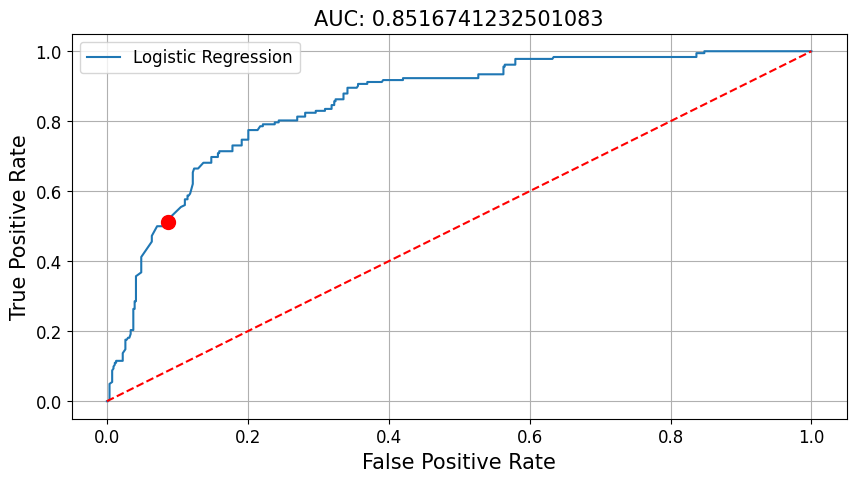

ROC Curve: Test


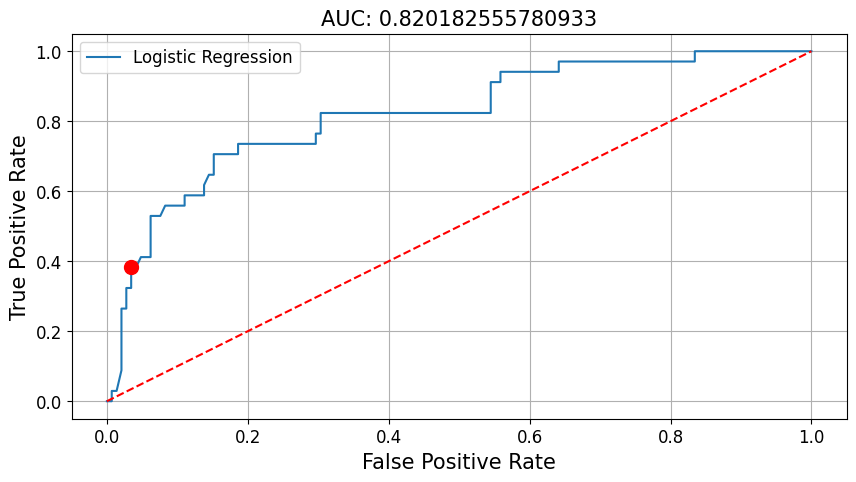

Precision-Recall Curve: Train


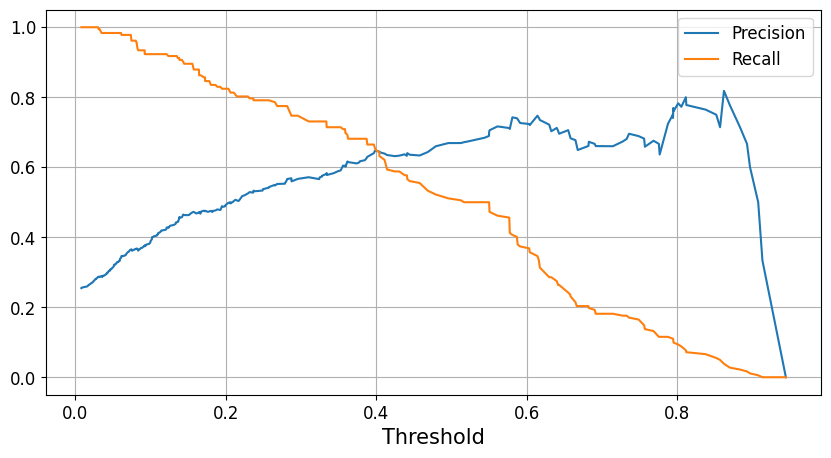

Precision-Recall Curve: Test


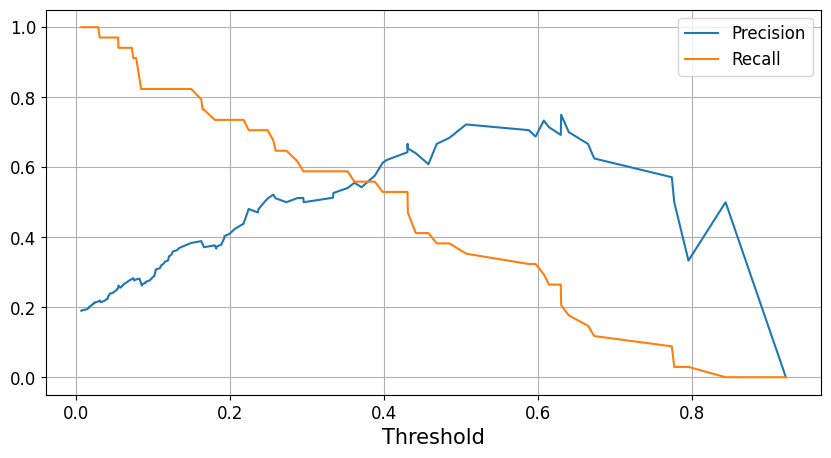

In [23]:
# Confusion Matrix 함수화
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true, Y_pred)
    conf_mat = pd.DataFrame(conf_mat, 
                            index=['True: 0', 'True: 1'], 
                            columns=['Pred: 0', 'Pred: 1'])
    
    return conf_mat


# Classification Report 함수화
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(classification_report(Y_true, Y_pred, 
                                target_names=['class 0', 'class 1']))


# ROC Curve & AUC 함수화
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5)):
    fpr, tpr, thresholds = roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
    
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()


# Precision & Recall Curve 함수화
def evaluation_class_PrecisionRecall(Y_true, P_pred, figsize=(10,5)):
    pre, rec, thresholds = precision_recall_curve(Y_true, P_pred)
    
    plt.figure(figsize=figsize)
    plt.plot(thresholds, pre[:-1], label='Precision')
    plt.plot(thresholds, rec[1:], label='Recall')
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()

    ## Confusion Matrix
print('Confusion Matrix: Train')
display(evaluation_class_ConfusionMatrix(Y_train, P_trpred>=0.5))
print('Confusion Matrix: Test')
display(evaluation_class_ConfusionMatrix(Y_test, P_tepred>=0.5))

## Classification Report
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, P_trpred>=0.5)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, P_tepred>=0.5)

## ROC Curve & AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred)

## Precision & Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred)
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred)

In [ ]:
# Train 데이터의 confusion matrix에서는 예측이 어느 정도 균형을 이루고 있지만, Test 데이터의 confusion matrix에서 1을 예측할 때, 틀릴 경우가 (21) 더 많은 것을 알 수 있다. 즉, 실제 1인 경우를 더 잘 예측하지 못하고 있습니다. 따라서, Test 데이터의 성능이 더 좋다고 평가할 수 있다. Test 데이터에서는 1을 예측하는 더 좋은 성능을 보여주고 있다.
# Test 데이터의 정확도와 f1-score가 더 높은 것을 확인할 수 있다. 따라서, Classification Metrics를 기준으로 볼 때, Test 데이터의 성능이 더 좋다고 평가할 수 있다. 
# ROC Curve를 기준으로 볼때, AUC가 Train이 더 크기 때문에, Train의 성능이 더 좋다.
# Precision-Recall Curve를 기준으로, 0.4 주변에서 정교하다.

# **Business Insight and Application: 분석결과의 비즈니스 활용 기획 및 전략**

- 위에서 분석한 결과를 사용하여 데이터의 `비즈니스 목적` 달성을 위해 어떻게 `비즈니스를 하면 좋을지 기획 또는 전략 의견을 주석으로 자유 작성`

In [ ]:
# 모델의 예측 결과를 기반으로 고객을 취소 가능성에 따라 세분화하고 관리한다. 예를 들어, 높은 취소 가능성을 가진 고객에 대해 개별적으로 접근하거나 적절한 프로모션을 제공한다.

In [ ]:
# 고객과의 원활한 커뮤니케이션을 통해 고객의 불만을 해소하고, 필요한 조치를 취함으로써 취소 가능성을 낮추고 기업과 고객 간의 관계를 강화한다.

In [ ]:
# 고객의 의견과 피드백을 수집하고 이를 개선에 반영한다. 

In [24]:
### 종료 및 본인정보 반영
# 반드시 이 cell을 실행하시오
# 실행하지 않을 시 직접 하지 않은 것으로 간주
# 마지막 줄 출력으로 파일명을 설정하고 제출 필수
import platform, psutil, os, datetime
print(platform.processor())
print(str(round(psutil.virtual_memory().total / (1024.0 **3)))+"(GB)")
print(platform.system())
print(platform.version())
print(os.getcwd())
print(datetime.datetime.fromtimestamp(os.path.getctime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getmtime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getatime(os.getcwd())))
print(datetime.datetime.now())
title = 'DA_SupervisedClassification'    # 고정값
name = '허유빈'    # 본인 이름을 작성
studentid = '202000251'    # 본인 학번을 작성
# 아래 강좌 명 중 본인이 수강하는 강과명 작성
# 비즈니스데이터사이언스이해, E정보시스템, 디지털비즈니스애널리틱스, E데이터베이스, 인공지능기반의사결정, 빅데이터 등
# 비즈니스혁신을위한데이터사이언스응용, 인공지능활용디지털경제플랫폼연구 등
course = 'E데이터베이스'    
print('다음 출력을 파일명으로 설정하고 제출하시오:', name + '_' + studentid + '_' + course + '_' + title)

Intel64 Family 6 Model 142 Stepping 11, GenuineIntel
8(GB)
Windows
10.0.22621
C:\Users\허\수업
2023-03-07 21:22:07.776971
2023-05-12 02:47:14.812151
2023-05-12 02:47:14.812151
2023-05-12 02:50:15.528950
다음 출력을 파일명으로 설정하고 제출하시오: 허유빈_202000251_E데이터베이스_DA_SupervisedClassification
